# Import Data

In [59]:
import numpy as np
import pandas as pd
import string

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

from sklearn.model_selection import train_test_split
%matplotlib inline

### *What is the dataset, Library Collection Inventory?*
##### This dataset includes monthly snapshot of all of the physical items in the Seattle Public Library’s collection. Consistent monthly data begins with a snapshot taken August 1, 2016, continuing to the present. Additionally, this dataset contains snapshots taken on: January 1 in the years 2012, 2013, 2014, and 2016.

### *Dataset Columns*

###### Subjects : Subject authroity records associated with the title, including Motion Pictures, Computer Programming, etc... Typiclaly these are highly specific

   ###### Item type : a code from the catalog record that describes the type of item. There are a total of 21 item types. Most commonly reported item types include: 
   ###### **acbk (adult book), accd (adult CD), jcbk (children's book)**
 

###### PublicationYear : The PublicationYear field includes the year from the catalog record in which the item was published, printed, or copyrighted as recorded in the Horizon bibliographic record.

###### This column is formatted as follows: 
   ###### 2005—publication date
   ###### c. 2005 – copyright symbol
   ###### [2005] – Printing date
   ###### p. 2005 – phonogram copyright symbol
   ###### 2004, c. 2005 – publication and copyright date
   ###### 2005-2007 – intervening years 
   ###### [2005?] – Approximate date

###### Reprot Date : The date when this item count was collected from the ILS (Horizon).

###### ItemCount : The number of items in this location, collection, item type, and item status as of the report date.


In [62]:
nRowsRead = 10000 # specify 'None' if want to read whole file
data = pd.read_csv("Library_Collection_Inventory.csv", usecols = ['Title','ReportDate', 'ItemCount', 'PublicationYear', 'Publisher', 'ItemType','Author'],  nrows = nRowsRead, keep_default_na = True)
data.dataframeName= 'library-collecion-inventory'
nRow, nCol = data.shape
data.tail(5)

,Title,Author,PublicationYear,Publisher,ItemType,ReportDate,ItemCount
9995,"No surrender : faith, family, and finding your...","Bisher, Patrick,",[2017],"Post Hill Press,",acbk,11/01/2020,1
9996,Diggersaurs explore / Michael Whaite.,"Whaite, Michael",[2020],"Random House,",jcbk,11/01/2020,1
9997,Ghost Hawk / Susan Cooper.,"Cooper, Susan, 1935-",[2013],"Margaret K. McElderry Books,",jcbk,11/01/2020,1
9998,The monsters collection : piano solo : selecti...,"Newman, Randy",[2013],Walt Disney Music Company : Wonderland Music C...,acmus,11/01/2020,1
9999,Nasty galaxy / Sophia Amoruso ; foreword by Co...,"Amoruso, Sophia",2016.,"G.P. Putnam's Sons,",acbk,11/01/2020,1


### Identifying Missing Data, and Tidying Up Data:

##### Here is the missing data for each of the columns we are concerned about. 'Author' values missing being the most 15.75 % of the total data. Followed by publication year & Publisher. In this case it would not make sense to fill in missing data as the missing values are specific to the item types, and so on... 

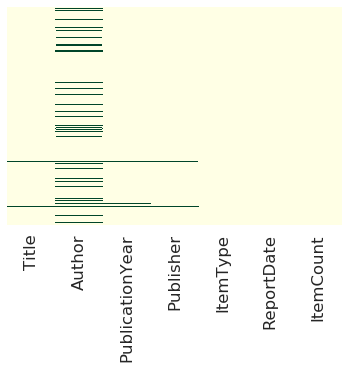

In [76]:
data.isnull().sum()
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,cmap='YlGn') # Majority of the missing data is from the 

##### Use dropna() to drop the rows with missing data. Axis=0 for rows, and = 1 for columns.

In [66]:
# New dataframe dataF will have all the missing values of the initial dataset removed
dataF = data.dropna(axis=0)
#Verify removal of missing values from data. 
num_rowsF = dataF.shape[0]
num_missingF = num_rowsF -dataF.count()
print(num_missingF)

Title              0
Author             0
PublicationYear    0
Publisher          0
ItemType           0
ReportDate         0
ItemCount          0
dtype: int64


In [67]:
dataF.memory_usage(deep=True) # memory usage in bytes

Index                67800
Title              1237942
Author              688445
PublicationYear     532084
Publisher           680255
ItemType            517558
ReportDate          567825
ItemCount            67800
dtype: int64

#### **Memory Considerations:**

##### Each column  is taking up large amount of  more memory. For the columns with few unique values, we will convert those to Categorical, DateTime, etc... types. Categorical types will allow to store each unique name once and use space-efficient integers to know which specific value is used in each row.

##### There are not enough numeric values to warrant an attempt in memory reduction


## Sorting & Ordering

##### Identify Unique value count for each columns

In [78]:
print('Item collections : {}'.format(data['Author'].nunique()))
print('Pulication year : {}'.format(data['PublicationYear'].nunique()))
print('Item publisher : {}'.format(data['Publisher'].nunique()))
print('Item types : {}'.format(data['ItemType'].nunique()))
print('Item report date : {}'.format(data['ReportDate'].nunique()))
print('Item count : {}'.format(data['ItemCount'].nunique()))

Item collections : 7228
Pulication year : 602
Item publisher : 4213
Item types : 31
Item report date : 1
Item count : 31


#### Modify columns to Date formats

In [69]:
#Convert Object Type PublicationYear & ReportDate columns to datetime types. 
dataF['Report Date'] = pd.to_datetime(dataF['ReportDate'], format ='%m/%d/%Y')
print(dataF.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            8475 non-null   object        
 1   Author           8475 non-null   object        
 2   PublicationYear  8475 non-null   object        
 3   Publisher        8475 non-null   object        
 4   ItemType         8475 non-null   object        
 5   ReportDate       8475 non-null   object        
 6   ItemCount        8475 non-null   int64         
 7   Report Date      8475 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 595.9+ KB
None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
dataF['Author'].value_counts().head(10)

Patterson, James, 1947-                                                        16
United States. Congress. House. Committee on Rules                             15
Seuss, Dr.                                                                     14
United States. Congress. Senate. Committee on Energy and Natural Resources.    13
Meadows, Daisy                                                                 10
Stilton, Geronimo                                                              10
United States. President (1993-2001 : Clinton)                                  9
United States. Congress. Senate. Committee on Foreign Relations                 9
United States. Congress. House. Committee on the Judiciary                      9
Warner, Gertrude Chandler, 1890-1979                                            8
Name: Author, dtype: int64

#### Data Tally 


##### How can I take the data value count for a given column (i.e. Author), then uset that to subtract from the missing data values to figure out how much percentage of the original value is missing for each value type? 

##### Is there a method to figure out if there are columns with overlapping  missing data? 

In [34]:
print('\n')
print (data.columns)
print('\n\n')
print (data.dtypes)
print('\n\n')
print (data.count())



Index(['Title', 'Author', 'PublicationYear', 'Publisher', 'ItemType',
       'ReportDate', 'ItemCount'],
      dtype='object')



Title              object
Author             object
PublicationYear    object
Publisher          object
ItemType           object
ReportDate         object
ItemCount           int64
dtype: object



Title               9967
Author              8516
PublicationYear     9866
Publisher           9934
ItemType           10000
ReportDate         10000
ItemCount          10000
dtype: int64


In [93]:
data["ItemType"] = dataF["ItemType"].astype('category') #Change Item Types as category column

In [37]:
dataF[dataF["PublicationYear"] == '[2011]']

,Title,Author,PublicationYear,Publisher,ItemType,ReportDate,ItemCount
0,"Snot, poop, vomit, and more : the yucky body b...","Silverstein, Alvin",[2011],"Enslow Publishers,",jcbk,11/01/2020,1
31,Life of Fred. Honey / Stanley F. Schmidt.,"Schmidt, Stanley F. (Stanley Fredric), 1944-",[2011],"Polka Dot Pub.,",jcbk,11/01/2020,1
92,Joint Resolution Making Further Continuing App...,United States.,[2011],"[U.S. G.P.O.],",arbk,11/01/2020,1
97,Tyrannosaurus rex / Sara Gilbert.,"Gilbert, Sara",[2011],"Creative Education,",jcbk,11/01/2020,1
124,Love shrinks : a memoir of a marriage counselo...,"Wolf, Sharyn",[2011],"Soho Press,",acbk,11/01/2020,1
...,...,...,...,...,...,...,...
9412,Wicked Autumn / G.M. Malliet.,"Malliet, G. M., 1951-",[2011],"Dreamscape Media,",accd,11/01/2020,1
9578,Bloodmoney : a novel / David Ignatius.,"Ignatius, David, 1950-",[2011],"W.W. Norton & Co.,",acbk,11/01/2020,1
9724,"Goodnight, goodnight, construction site / Sher...","Rinker, Sherri Duskey",[2011],"Chronicle Books,",jcbk,11/01/2020,1
9766,The weird sisters / Eleanor Brown.,"Brown, Eleanor, 1973-",[2011],"Amy Einhorn Books/G.P. Putnam's Sons,",acbk,11/01/2020,1


In [89]:
dataF['ItemType'].unique()


array(['jcbk', 'acbk', 'armfc', 'arbk', 'accd', 'acmus', 'jccd', 'jrbk',
       'bcbk', 'armap', 'acmap', 'acrec', 'acdvd', 'pkbknh', 'arpam',
       'arper', 'armus', 'accdrom', 'acvhs', 'arcd', 'armfm'],
      dtype=object)

In [113]:
ItemCategories = data['ItemType'].value_counts(ascending=True)

In [114]:
ItemCategories = pd.DataFrame(ItemCategories[-10:]).reset_index()
ItemCategories.columns = ["ItemType", "ItemCount"]
ItemCategories

,ItemType,ItemCount
0,arper,13
1,acmap,17
2,bcbk,35
3,jccd,63
4,acmus,63
5,armfc,425
6,accd,516
7,arbk,787
8,jcbk,2095
9,acbk,4398


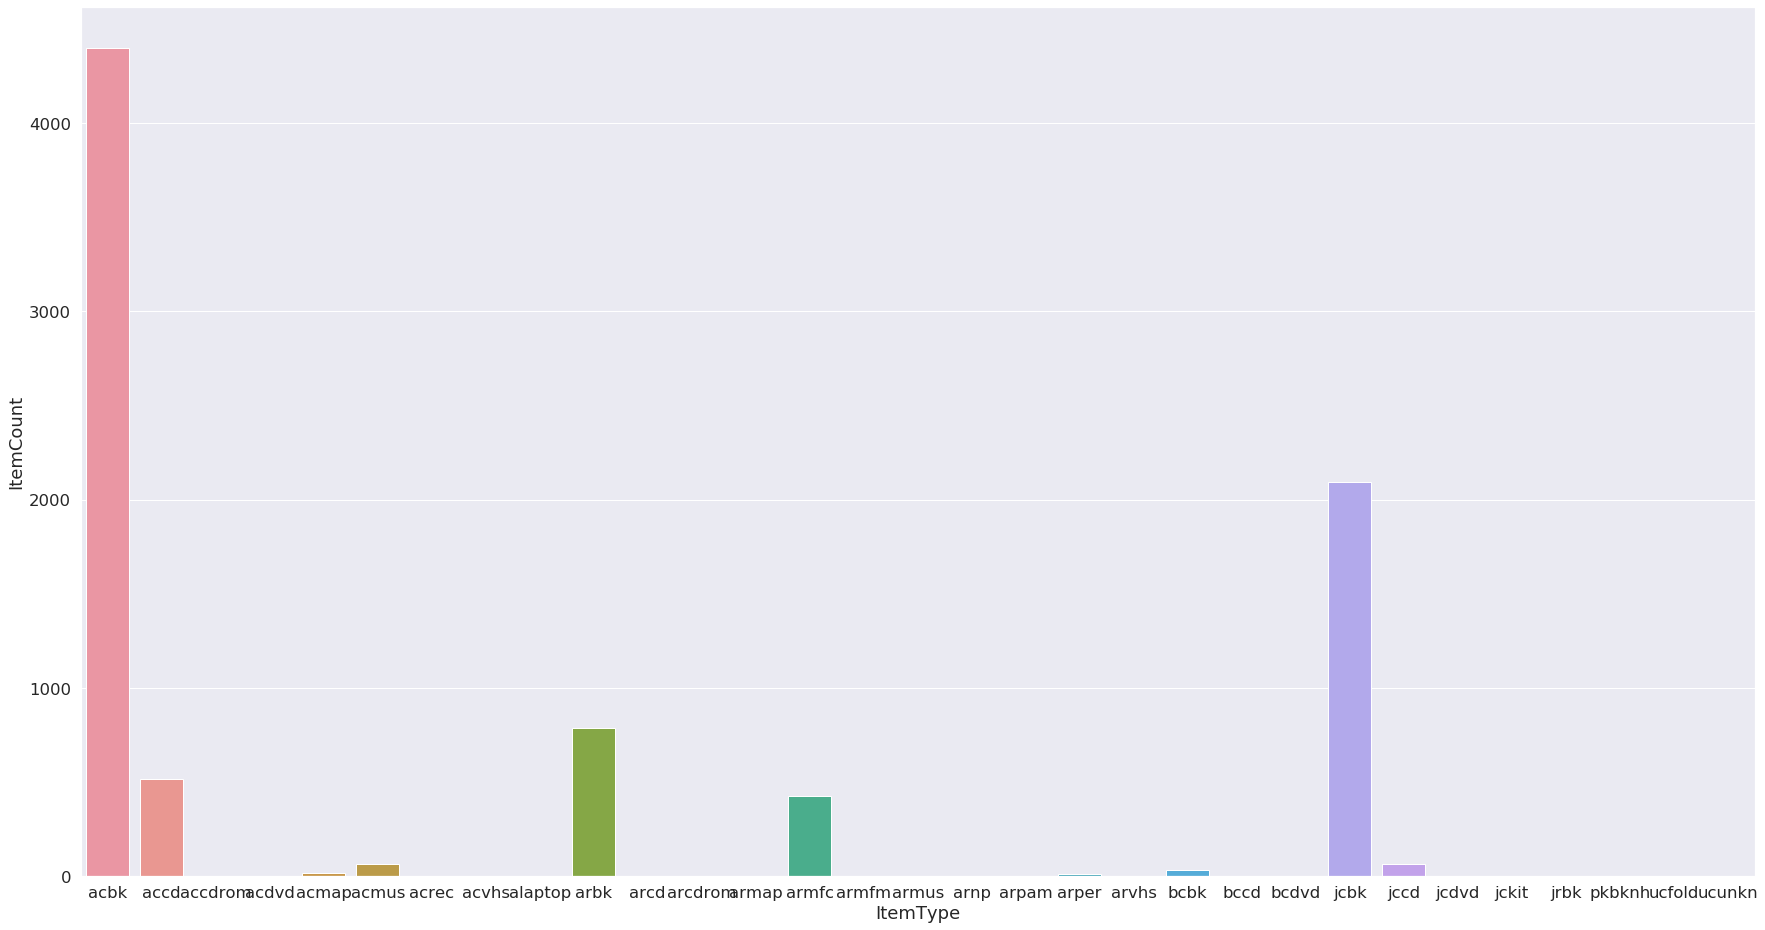

In [115]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategories)

# Merging, Joining, and Concatenating: 


In [82]:
dataF['ItemType'].unique()
dataF['Publisher'].unique()
len(dataF['Publisher'].unique())
dataF['ReportDate'].unique()
len(dataF['ReportDate'].unique())
len(dataF['PublicationYear'].unique())
dataF['PublicationYear'].nunique()
dataF['PublicationYear'].value_counts()
dataF['Publisher'].value_counts()

U.S. G.P.O.,                                               172
[U.S. G.P.O.],                                              99
Random House,                                               98
[publisher not identified],                                 85
Candlewick Press,                                           79
                                                          ... 
L.J.C. Boucher,                                              1
Trialtea USA,                                                1
Five Star Publishing, a part of Cengage Learning, Inc.,      1
J Paul Getty Museum,                                         1
Island Press,                                                1
Name: Publisher, Length: 3487, dtype: int64

#### Drop ItemTypes & other values that are small in value

In [43]:
for ItemType in dataF: 
   if dataF['ItemType'].value_counts() < 20:
         dataF.dropna(axis = 0)
    

#dataF['ItemType'].value_counts()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
dataF.columns

In [44]:
dataF.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9989, 9990, 9991, 9992, 9993, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=8475)

# Plot Fgure Size, and DPI

In [119]:
publishers = data['Publisher'].value_counts(ascending=True)

In [120]:
top_10_publishers = pd.DataFrame(publishers[-10:]).reset_index()
top_10_publishers.columns = ["Publisher", "Publications"]
top_10_publishers

,Publisher,Publications
0,"Little, Brown and Company,",69
1,"U.S. G.P.O. : For sale by the Supt. of Docs., ...",73
2,"U.S. G.P.O. : For sale by the U.S. G.P.O., Sup...",73
3,"Alfred A. Knopf,",74
4,"Houghton Mifflin Harcourt,",78
5,"Candlewick Press,",79
6,"[U.S. G.P.O.],",99
7,"Random House,",101
8,"[publisher not identified],",106
9,"U.S. G.P.O.,",200


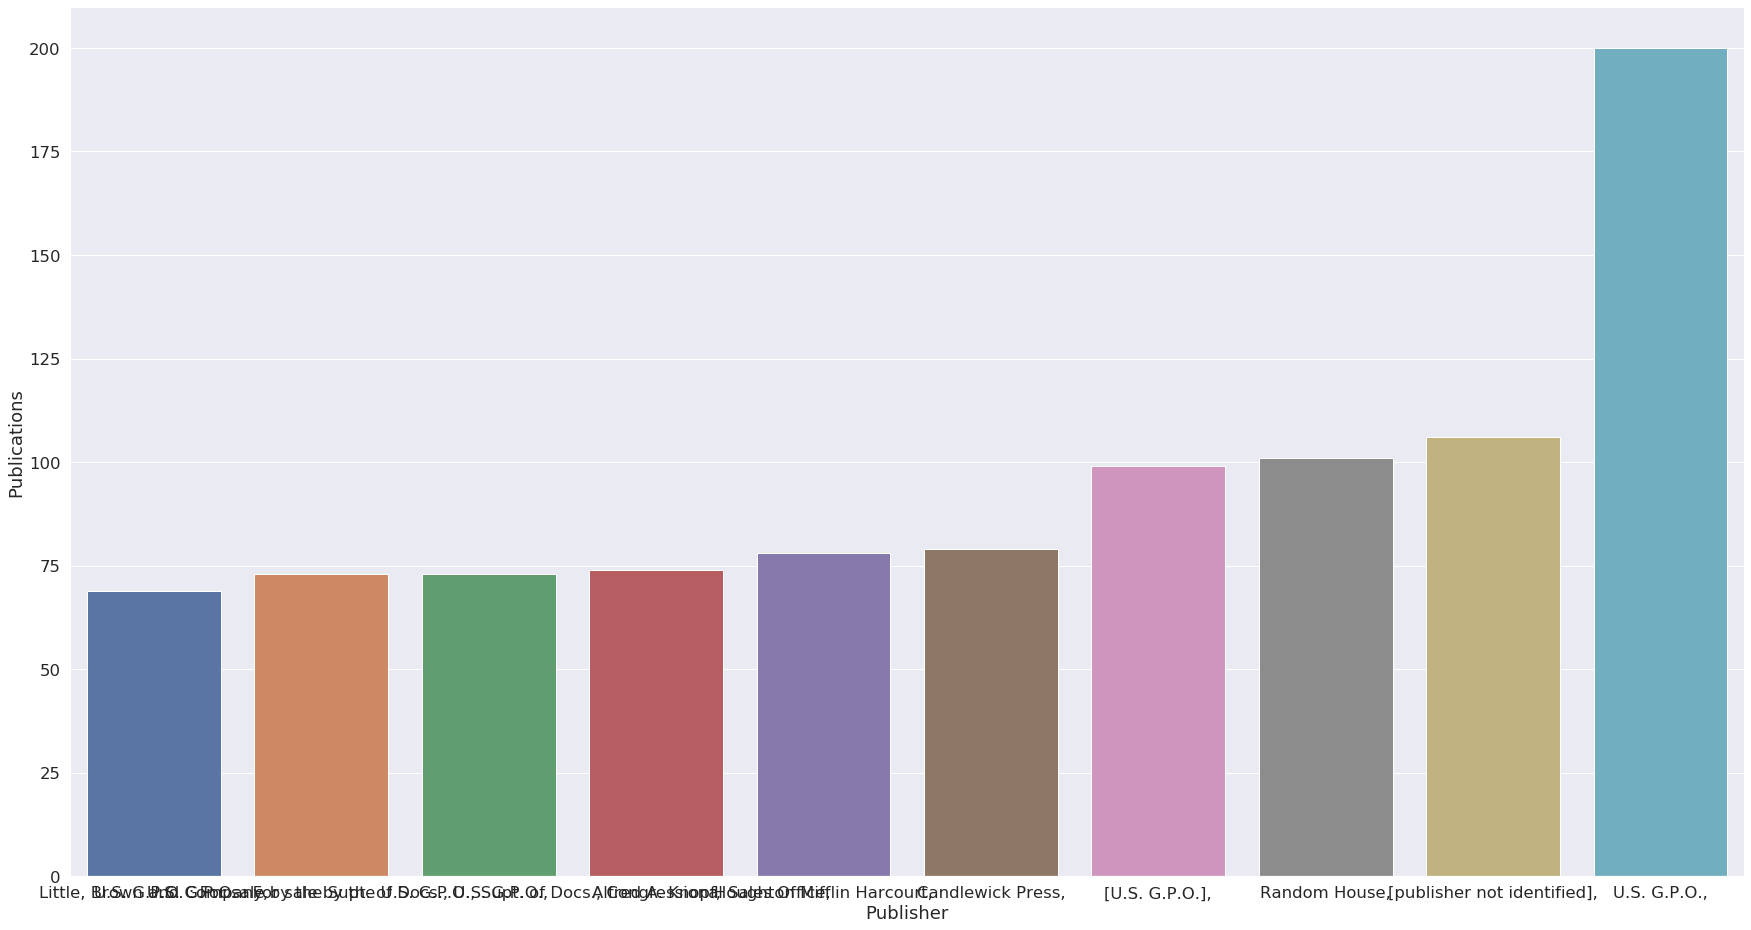

In [121]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='Publisher',y='Publications', data=top_10_publishers)

How is amount of publications distributed between publishers? Is this distribution normal?

/home/kgeme002/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

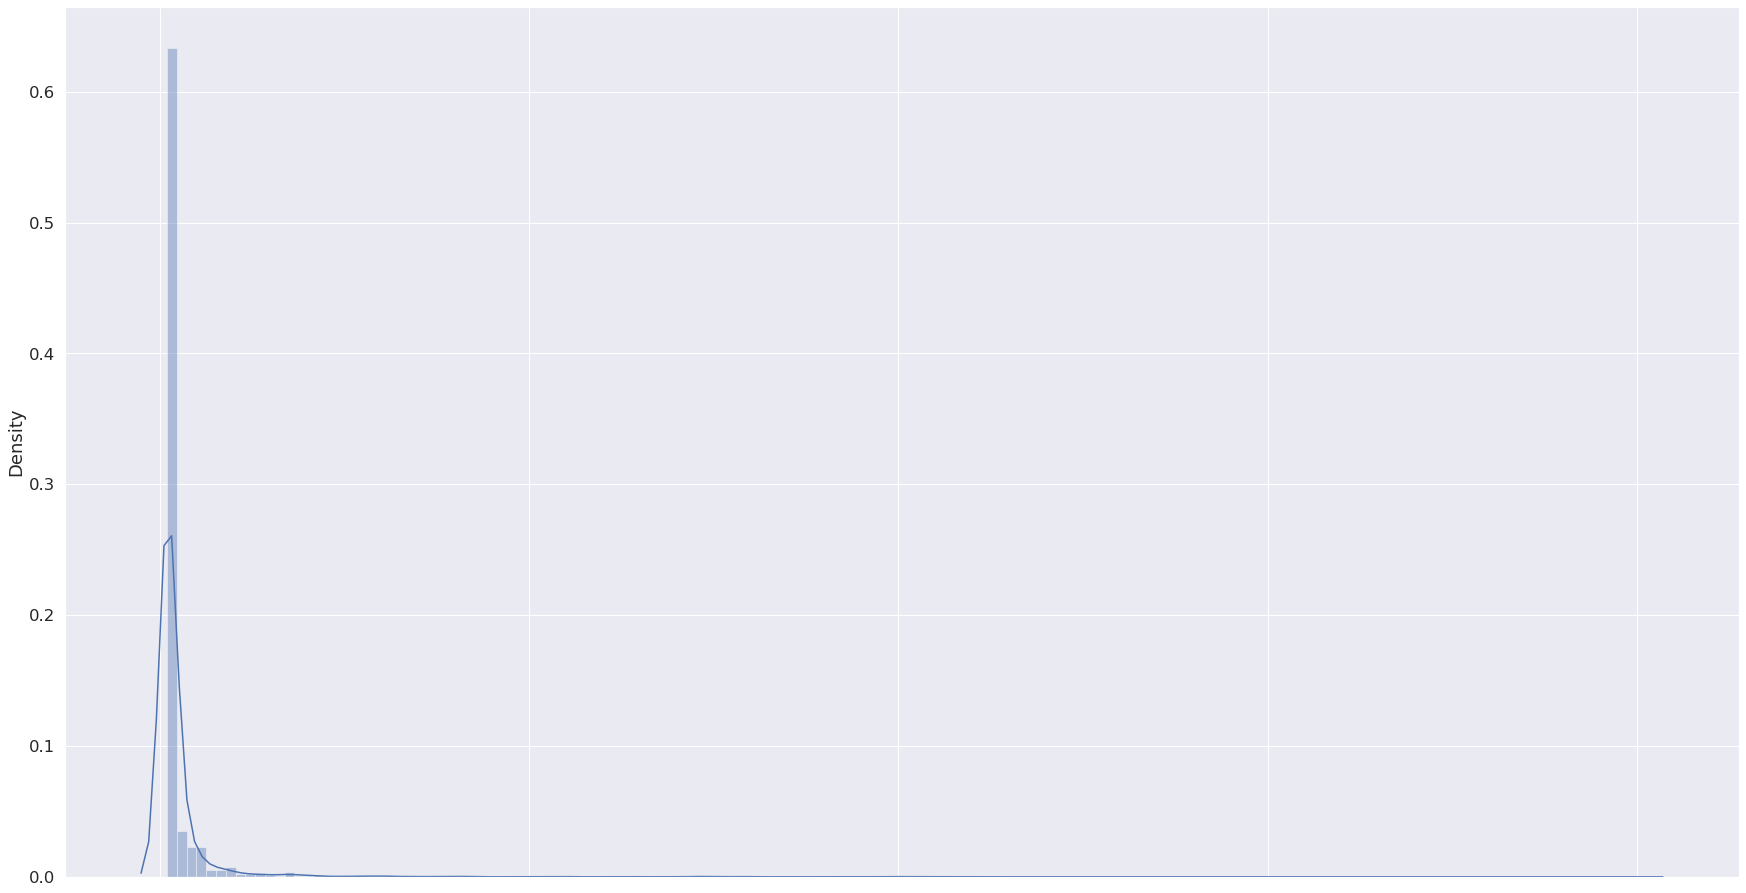

In [48]:
publishers_arranged = pd.DataFrame(publishers).reset_index()
publishers_arranged.columns = ["Publisher", "Publications"]
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.distplot(publishers_arranged, x=publishers_arranged["Publications"], bins = 150)
p.set(xticklabels=[])
p

There are a lot of publishers with few titles. I will remove those who had 10 titles or less.

/home/kgeme002/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

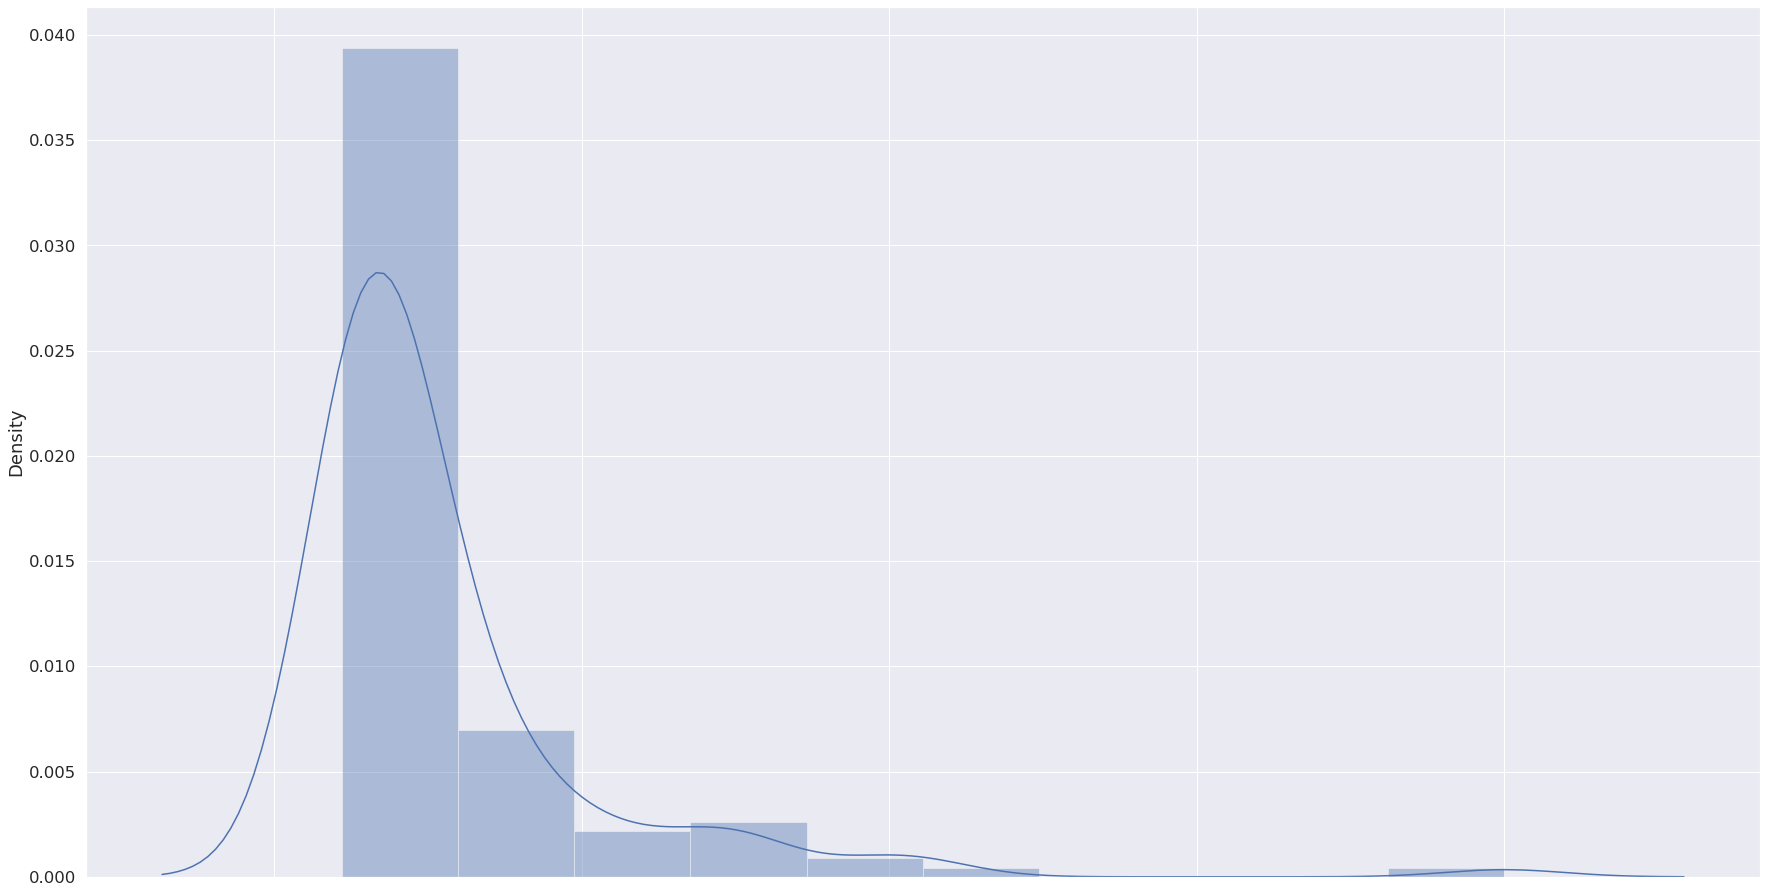

In [49]:
publishers_arranged = pd.DataFrame(publishers).reset_index()
publishers_arranged.columns = ["Publisher", "Publications"]
publishers_active = publishers_arranged[publishers_arranged["Publications"] > 10]
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.distplot(publishers_arranged, x=publishers_active["Publications"], bins = 10)
p.set(xticklabels=[])
p

I would also like to see how publishing industry was developing through years.

In [50]:
publications_by_year = data['PublicationYear'].value_counts()
publications_by_year = pd.DataFrame(publications_by_year).reset_index()
publications_by_year.columns = ["Year", "Publications"]
publications_by_year.head()

,Year,Publications
0,[2018],543
1,[2019],528
2,[2017],449
3,2019.,431
4,2018.,419


Will need to perform some data clearing

# QUESTION HERE

In [51]:
data['PublicationYearNumeric'] = data['PublicationYear'].str.replace("[^0-9]",'') # removing everything that is non-numeric
data['PublicationYearNumeric'] = pd.to_numeric(data['PublicationYear'], errors='coerce') # convert data to numeric values

In [52]:
publications_by_year = data['PublicationYearNumeric'].value_counts()
publications_by_year = pd.DataFrame(publications_by_year).reset_index()
publications_by_year.columns = ["Year", "Publications"]
publications_by_year.head()

,Year,Publications
0,2019.0,441
1,2018.0,423
2,2017.0,366
3,2016.0,290
4,2015.0,235


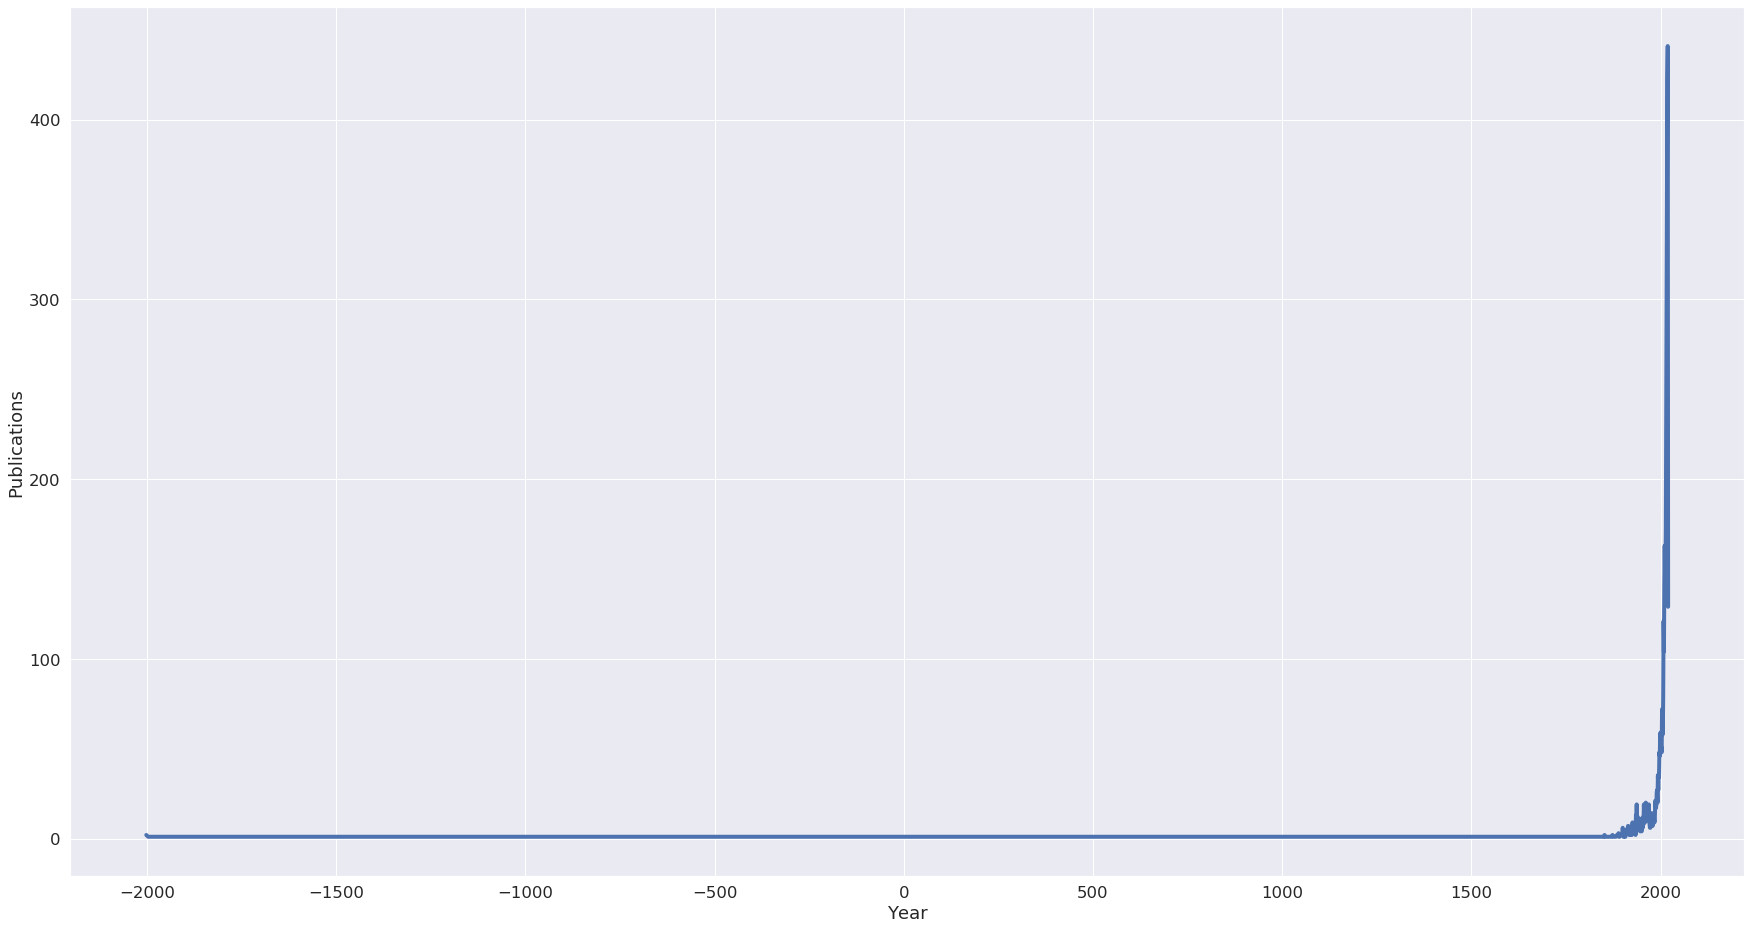

In [53]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.lineplot(x = "Year", y = "Publications", data = publications_by_year, linewidth = 4)

Will also need to filter out publication year. Let's say, limit it to XX century.

In [54]:
publications_by_year_1900_2000 = publications_by_year[(publications_by_year['Year'] >= 1900) & (publications_by_year['Year'] < 2000)]

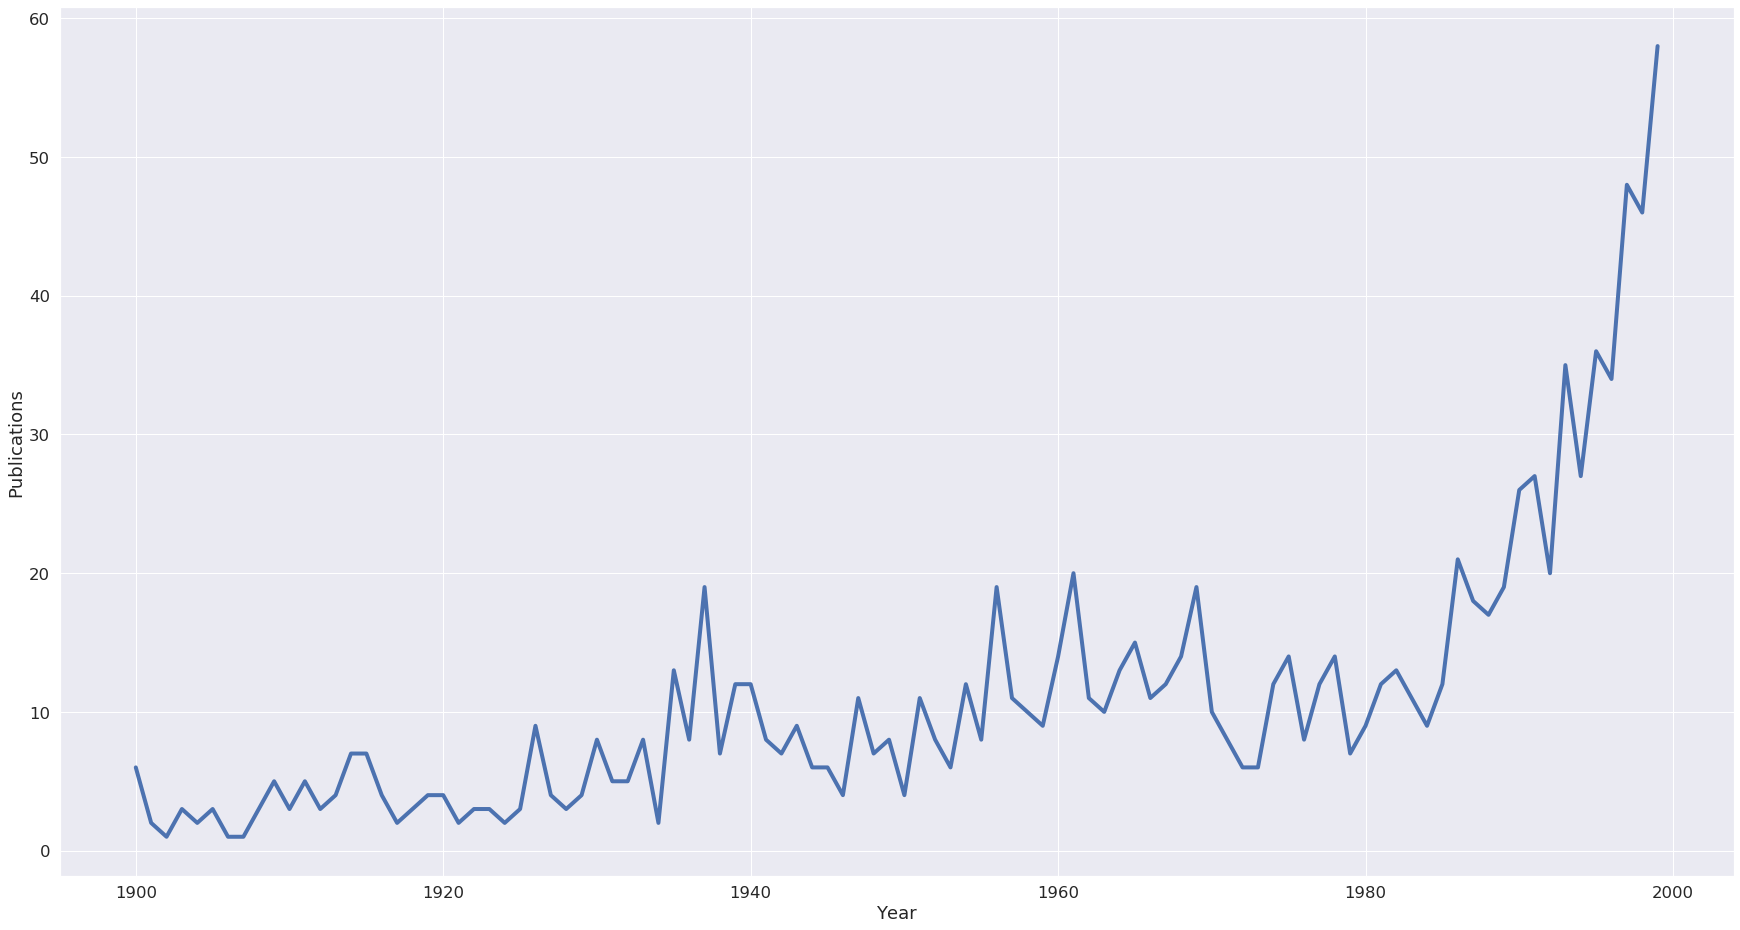

In [55]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.lineplot(x = "Year", y = "Publications", data = publications_by_year_1900_2000, linewidth = 4)

# Item Type Inventory Analysis: 

In [123]:
ItemCategories = data['ItemType'].value_counts(ascending=True)

In [124]:
ItemCategories = pd.DataFrame(ItemCategories[-5:]).reset_index()
ItemCategories.columns = ["ItemType", "ItemCount"]
ItemCategories

,ItemType,ItemCount
0,armfc,425
1,accd,516
2,arbk,787
3,jcbk,2095
4,acbk,4398


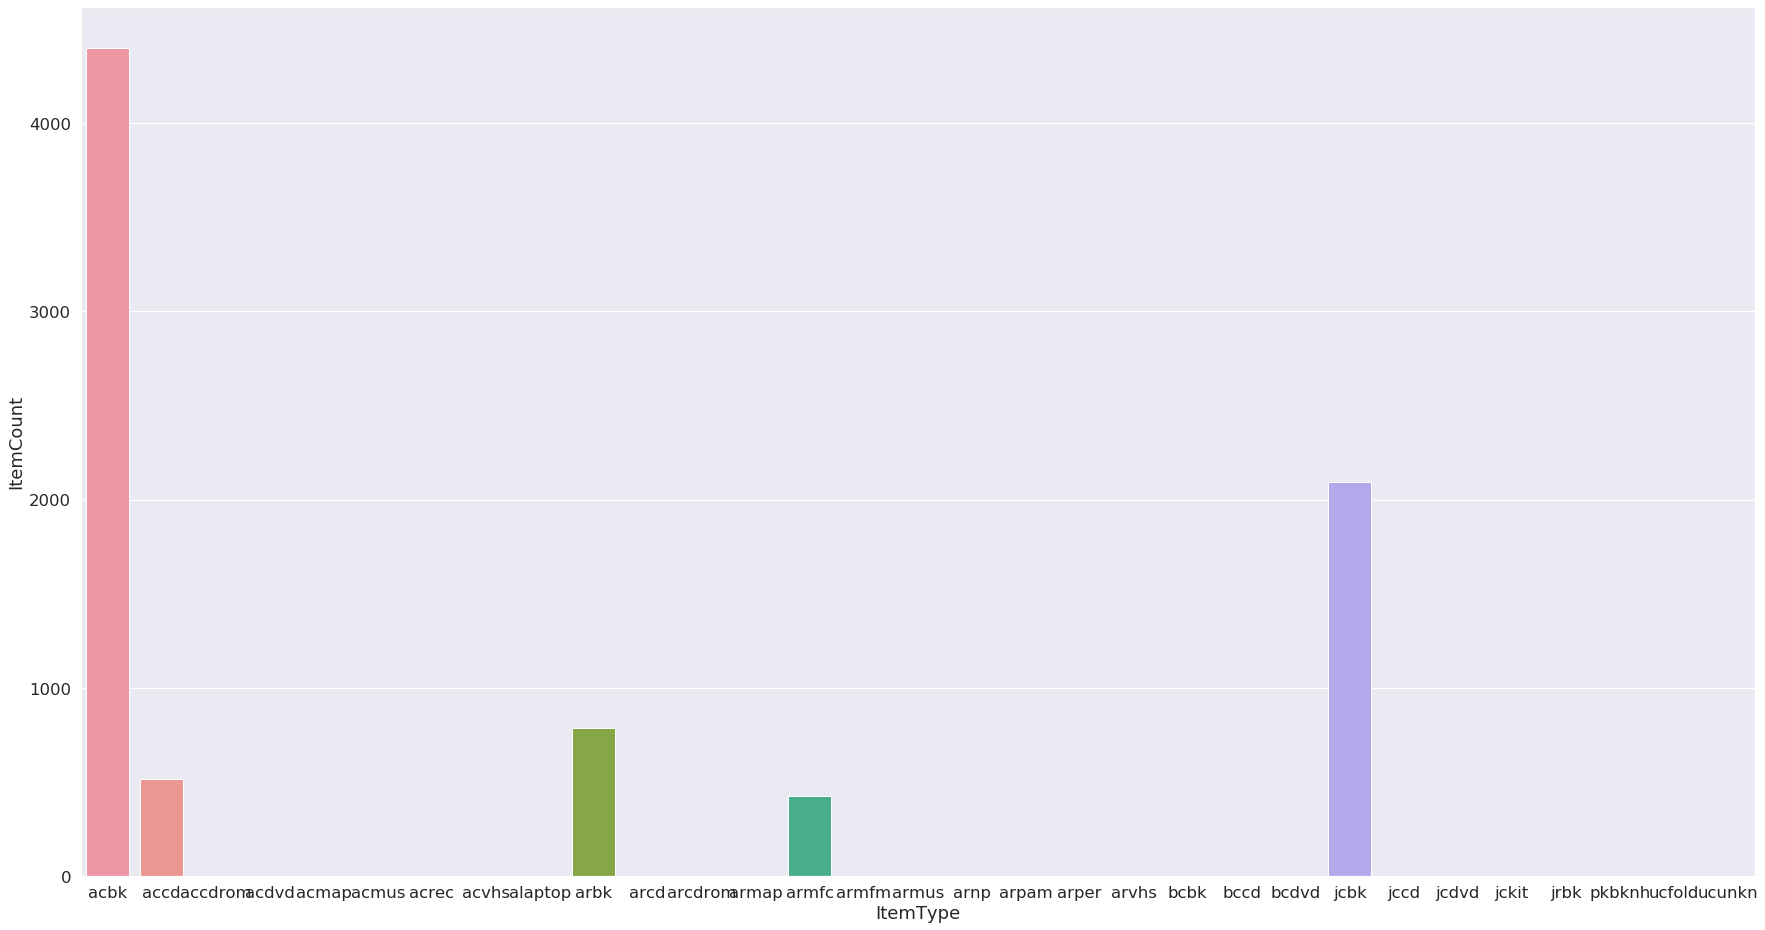

In [125]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategories)


### Selecting Data for Training & Testing

Can we fit a linear model to predict publications in given year?

### use mean squred error to determine how far away your predicition was from the mean abs value 

In [57]:
import statsmodels.api as sm
publications_by_year_1900_2000
X = sm.add_constant(publications_by_year_1900_2000['Year'])
model = sm.OLS(publications_by_year_1900_2000['Publications'], X)
results = model.fit()
plt.scatter(publications_by_year_1900_2000['Year'], publications_by_year_1900_2000['Publications'], alpha=0.7)
y_predict = results.params[0] + results.params[1]*publications_by_year_1900_2000['Year']
plt.plot(publications_by_year_1900_2000['Year'], y_predict, linewidth=3)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
rom sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_true = test_data.price.values, y_pred = lm.predict(test_X))
MSE
MSE**(0.5)